In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [15]:
stock = 'TSLA'
start = datetime.datetime(2023, 1, 1)
end = datetime.datetime(2024, 8, 26)
tsla = yf.download(stock, start=start, end=end, interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [16]:
tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800
2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000
2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300
2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100
2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000


In [17]:
tsla_filtered = tsla[['Open', 'High', 'Low', 'Volume']]
X = tsla_filtered
y = tsla['Close']

In [18]:
train_len = int(len(tsla)*0.8)
X_train, y_train = X[:train_len], y[:train_len]
X_test, y_test = X[train_len:], y[train_len:]

In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [20]:
sarimax = SARIMAX(y_train, exog=X_train, order=(8, 1, 8))
sarimax_results = sarimax.fit(disp=0)

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
start = len(X_train)
end = len(X_train) + len(X_test) - 1

In [23]:
sarima_pred = sarimax_results.predict(start, end, exog=X_test)
sarima_pred.index = X_test.index

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


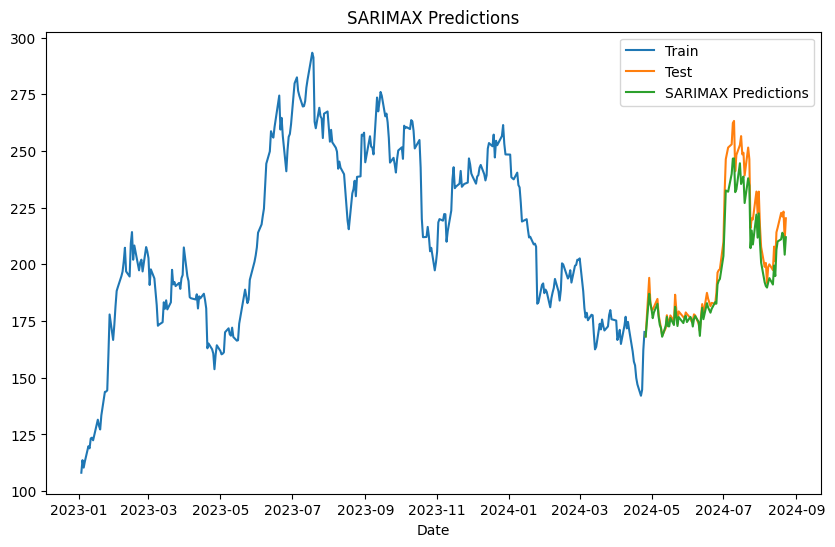

In [25]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(sarima_pred, label='SARIMAX Predictions')
plt.title('SARIMAX Predictions')
plt.xlabel('Date')
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
mae_sarimax = mean_absolute_error(y_test, sarima_pred)
mse_sarimax = mean_squared_error(y_test, sarima_pred)
rmse_sarimax = np.sqrt(mean_squared_error(y_test, sarima_pred))

In [33]:
sarimax_perf = {'mae_sarimax': mae_sarimax,
                'mse_sarimax': mse_sarimax,
                'rmse_sarimax': rmse_sarimax}
sarimax_perf = pd.DataFrame([sarimax_perf])
sarimax_perf

,mae_sarimax,mse_sarimax,rmse_sarimax
0,5.853308,58.601835,7.655184


In [34]:
sarimax_model = SARIMAX(y, order=(8, 1, 8))
sarimax_results = sarimax_model.fit(disp=0)

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
sarimax_forecast = sarimax_results.forecast(steps=10, exog=X_test.iloc[-10:])
forecast_index = pd.date_range(y.index[-1], periods=10)
sarimax_forecast.index = forecast_index

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


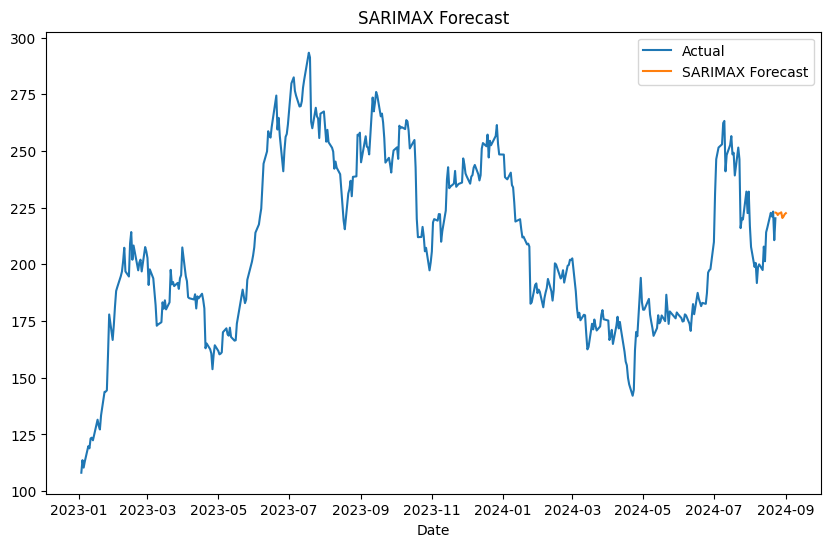

In [41]:
plt.plot(tsla['Close'], label='Actual')
plt.plot(sarimax_forecast, label='SARIMAX Forecast')
plt.title('SARIMAX Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

### Same procedure as SARIMAX for ARMA, ARIMA, SARIMA. Compare the mae, mse and rmse for choosing model.

In [42]:
sarimax_forecast.head(10)

2024-08-23    222.816903
2024-08-24    222.685193
2024-08-25    221.757568
2024-08-26    222.456381
2024-08-27    222.577652
2024-08-28    222.948407
2024-08-29    220.449161
2024-08-30    221.127576
2024-08-31    222.121649
2024-09-01    222.576621
Freq: D, Name: predicted_mean, dtype: float64

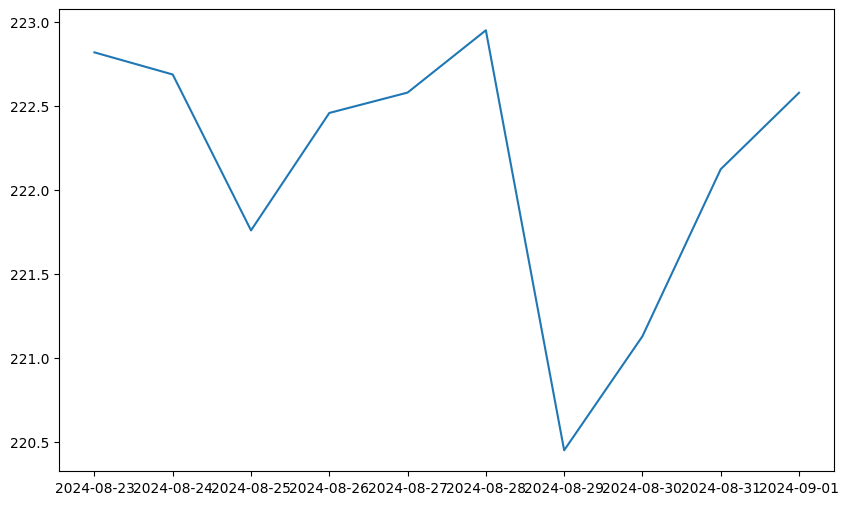

In [43]:
plt.plot(sarimax_forecast, label='SARIMAX Forecast')